## Check if output data looks reasonable

In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Output of simulation

file_path = '../../../../out/Test_idealized/'
file_name = 'FIONA_2-3D_DOM01_PL_0001.nc'

ds = xr.open_dataset(file_path+file_name)
ds

<xarray.Dataset>
Dimensions:    (ncells: 2469998, plev: 21, time: 2, vertices: 3)
Coordinates:
  * time       (time) datetime64[ns] 2016-08-17T12:00:00 2016-08-17T12:10:00
    clon       (ncells) float32 ...
    clat       (ncells) float32 ...
  * plev       (plev) float64 5e+03 1e+04 1.5e+04 ... 9.5e+04 9.75e+04 1e+05
Dimensions without coordinates: ncells, vertices
Data variables:
    clon_bnds  (ncells, vertices) float32 ...
    clat_bnds  (ncells, vertices) float32 ...
    u          (time, plev, ncells) float32 ...
    v          (time, plev, ncells) float32 ...
    w          (time, plev, ncells) float32 ...
    rh         (time, plev, ncells) float32 ...
    temp       (time, plev, ncells) float32 ...
    clc        (time, plev, ncells) float32 ...
    geopot     (time, plev, ncells) float32 ...
    qv         (time, plev, ncells) float32 ...
    qc         (time, plev, ncells) float32 ...
    qr         (time, plev, ncells) float32 ...
    qi         (time, plev, ncells) float32 ...
    div        (time, plev, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          70554a06-ee52-11e8-85ba-61ba733eb070
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd6...
    history:              /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x...
    references:           see MPIM/DWD publications
    comment:              bekthkis (bekthkis) on gcn1202 (Linux 3.10.0-1062.9...

In [25]:
print(ds.clon.max()*180/np.pi)
print(ds.clon.min()*180/np.pi)
print(ds.clat.max()*180/np.pi)
print(ds.clat.min()*180/np.pi)



r_earth = 6371
km = 1.25
deg = 0.012

find_km = deg * np.pi/180 *r_earth
find_deg = km * 180 /(np.pi * r_earth) 
print(find_km, find_deg)

lon_nsteps = (ds.clon.min()*180/np.pi - ds.clon.max()*180/np.pi) / 0.018
lat_nsteps = (ds.clat.max()*180/np.pi - ds.clat.min()*180/np.pi) / 0.012

print(lon_nsteps, lat_nsteps)

1168*1188

<xarray.DataArray 'clon' ()>
array(-25.47824485)
<xarray.DataArray 'clon' ()>
array(-46.51264227)
<xarray.DataArray 'clat' ()>
array(19.04010512)
<xarray.DataArray 'clat' ()>
array(4.77890407)
1.334339119734705 0.011241520073984131
<xarray.DataArray 'clon' ()>
array(-1168.57763428) <xarray.DataArray 'clat' ()>
array(1188.43342108)


1387584

<IPython.core.display.Javascript object>


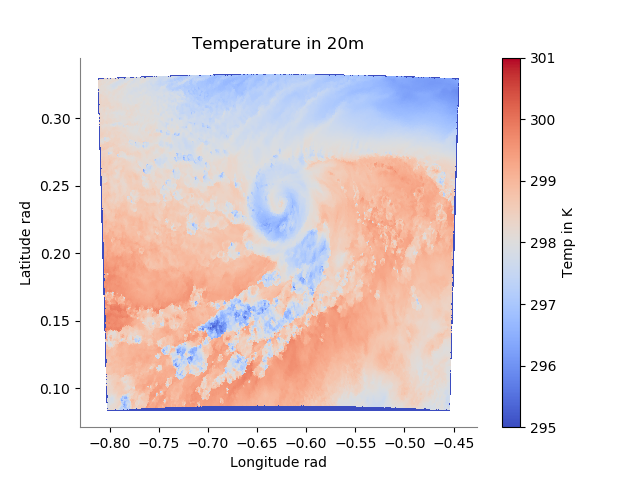

Text(0, 0.5, 'Temp in K')

In [33]:
# Create plot of level

plt.figure()
plt.tripcolor(ds.clon, ds.clat, ds.temp.isel( time=1, plev=-1), cmap='coolwarm')
plt.title('Temperature in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([295,301])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Temp in K')

<IPython.core.display.Javascript object>


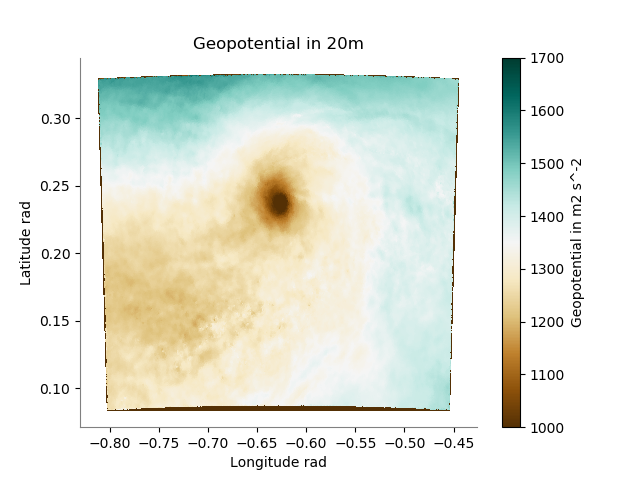

Text(0, 0.5, 'Geopotential in m2 s^-2')

In [36]:
# Create plot of level
plt.figure()
plt.tripcolor(ds.clon, ds.clat, ds.geopot.isel( time=1, plev=-1), cmap='BrBG')
plt.title('Geopotential in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([1000,1650])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Geopotential in m2 s^-2')

<IPython.core.display.Javascript object>


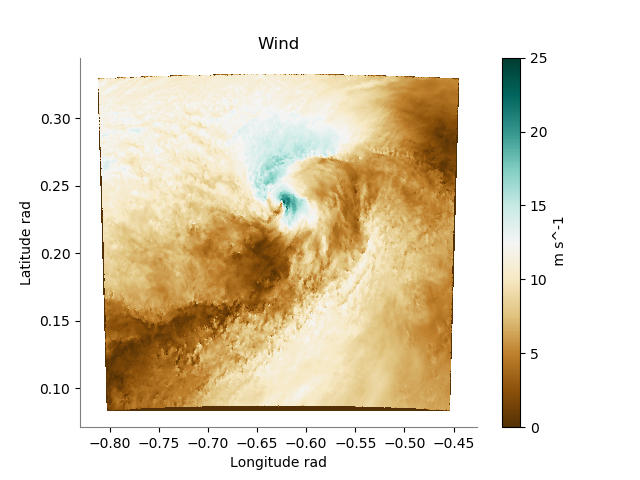

/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, ' m s^-1')

In [15]:
# Create plot of level
wind = np.sqrt(ds.u[1,-3]**2 + ds.v[1,-3]**2)

plt.tripcolor(ds.clon, ds.clat, wind, cmap='BrBG')
plt.title('Wind')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([0,25])
cbar = plt.colorbar() 
cbar.ax.set_ylabel(' m s^-1')

In [28]:

file_path = '../../../../out/Test_idealized_reg_grid/'
file_name = 'FIONA_idealized-3D_DOM01_ML_0001.nc'

ds = xr.open_dataset(file_path+file_name)
ds

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 90, height_2: 91, height_3: 91, lat: 1189, lon: 1169, time: 2)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-17T12:00:00 2016-08-17T12:30:00
  * lon            (lon) float32 -46.51 -46.492 -46.474 ... -25.504 -25.486
  * lat            (lat) float32 4.78 4.792 4.804 4.816 ... 19.012 19.024 19.036
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds
Data variables:
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    u              (time, height, lat, lon) float32 ...
    v              (time, height, lat, lon) float32 ...
    w              (time, height_2, lat, lon) float32 ...
    rh             (time, height, lat, lon) float32 ...
    temp           (time, height, lat, lon) float32 ...
    clc            (time, height, lat, lon) float32 ...
    geopot         (time, height, lat, lon) float32 ...
    qv             (time, height, lat, lon) float32 ...
    qc             (time, height, lat, lon) float32 ...
    qr             (time, height, lat, lon) float32 ...
    qi             (time, height, lat, lon) float32 ...
    qs             (time, height, lat, lon) float32 ...
    rho            (time, height, lat, lon) float32 ...
    pv             (time, height, lat, lon) float32 ...
    z_ifc          (height_3, lat, lon) float32 ...
    theta_v        (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0rc7 (http://mpimet.mpg....
    Conventions:  CF-1.6
    uuidOfVGrid:  9e236da2-70b7-518e-fb27-3f337d5d1f80
    title:        ICON simulation
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source:       git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd647d95d05...
    history:      /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x86_64-un...
    references:   see MPIM/DWD publications
    comment:      bekthkis (bekthkis) on gcn1378 (Linux 3.10.0-1062.9.1.el7.x...

In [33]:
temp = ds.temp.where(ds.temp > 200, drop = True)

<IPython.core.display.Javascript object>


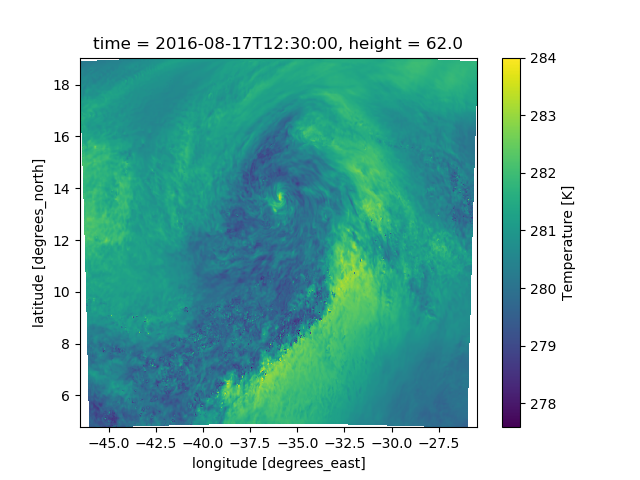

In [34]:
temp.isel(time=1, height=60).plot()